In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_train = pd.read_csv('/Users/angelali/Desktop/DS:ML/Kaggle projects/disaster tweet /final version /train.csv')
df_test = pd.read_csv('/Users/angelali/Desktop/DS:ML/Kaggle projects/disaster tweet /final version /test.csv', encoding ='latin1')

print('the numbers of datapoints in training set: {}'.format(len(df_train)))
print('the numbers of features in training set: {}'.format(len(df_train.columns)))
print('the numbers of datapoints in test set: {}'.format(len(df_test)))
print('the numbers of features test set: {}'.format(len(df_test.columns)))

the numbers of datapoints in training set: 7613
the numbers of features in training set: 5
the numbers of datapoints in test set: 3263
the numbers of features test set: 4


In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_test.head()

,keyword,location,text,target
0,NaN,NaN,Just happened a terrible car crash,1
1,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [5]:
df_train.drop('id', axis=1, inplace = True)

In [6]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,NaN,NaN,There's an emergency evacuation happening now ...,1
9,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Exploratory Data Analysis

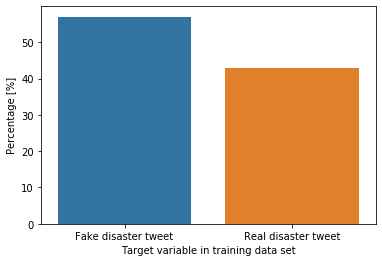

percentage of Fake disaster tweet is: 57.0%
percentage of Real disaster tweet is: 43.0%


In [7]:
# look at the target variable 

target_counts = df['target'].value_counts().div(len(df)).mul(100) # calculating percentages of target values

ax = sns.barplot(target_counts.index, target_counts.values)
ax.set_xlabel('Target variable in training data set')
ax.set_ylabel('Percentage [%]')
ax.set_xticklabels(['Fake disaster tweet','Real disaster tweet'])
plt.show()



print('percentage of Fake disaster tweet is: {}%'.format(round(target_counts[0])))
print('percentage of Real disaster tweet is: {}%'.format(round(target_counts[1])))

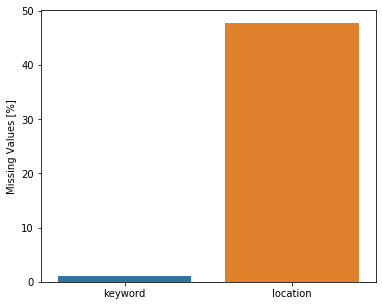

percentage of missing value in keyword is: 1.0%
percentage ofmissing value in location is: 48.0%


In [8]:
# Check the percentage of missing values in'Location' and 'Keyword' columns

missing_cols = ['keyword', 'location']

nan_percentage = df[missing_cols].isnull().sum()/len(df_train)*100


fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=nan_percentage.index, y=nan_percentage.values, ax=ax)
plt.ylabel('Missing Values [%]')
plt.show()

print('percentage of missing value in keyword is: {}%'.format(round(nan_percentage[0])))
print('percentage ofmissing value in location is: {}%'.format(round(nan_percentage[1])))

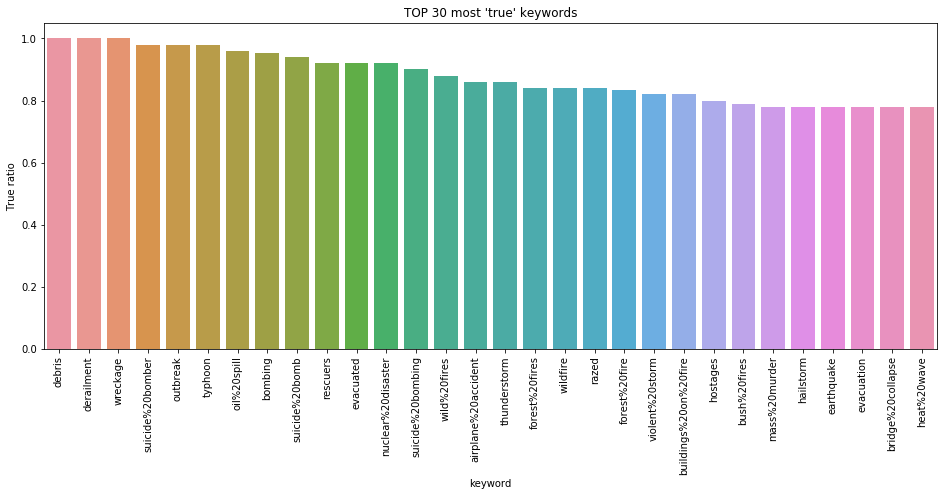

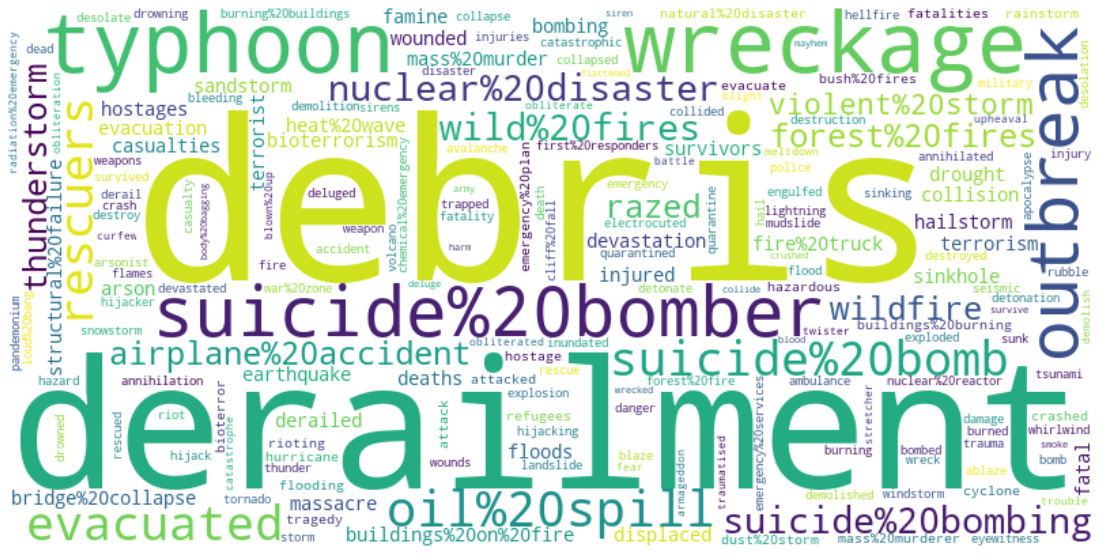

In [9]:
### Check the top 30 frequent keywods from the REAL disaster tweets and their true ratio

fig, ax = plt.subplots(figsize=(16,6))
true_ratios = df.groupby('keyword')['target'].mean().sort_values(ascending=False)
sns.barplot(x=true_ratios.index[:30], y=true_ratios.values[:30], ax=ax)
plt.xticks(rotation=90)
plt.title("TOP 30 most 'true' keywords")
plt.ylabel("True ratio")
plt.show()

############
disaster_tweet = dict(df[df['target']==1]['keyword'].value_counts())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(disaster_tweet)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

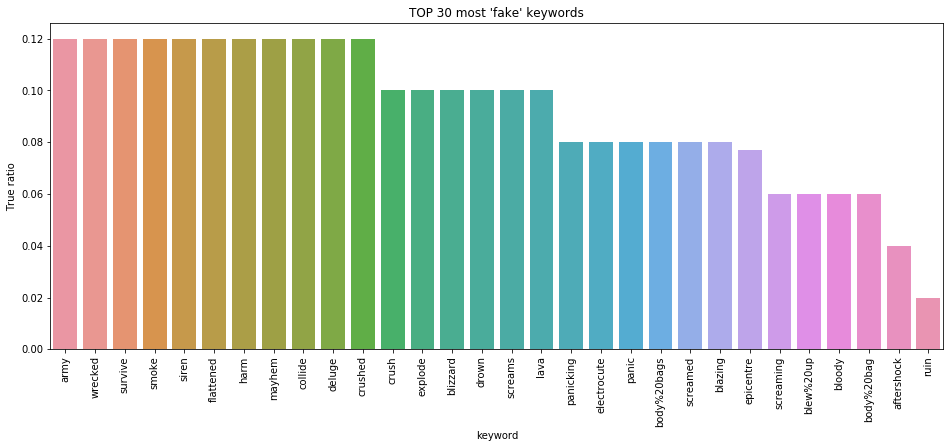

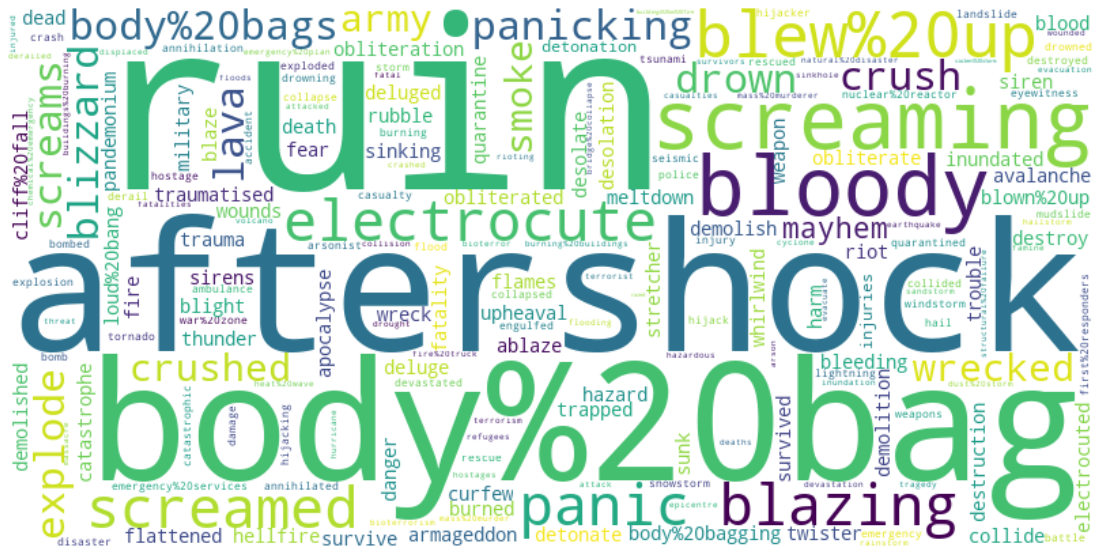

In [10]:
# Check the top 30 frequent keywods from the FAKE disaster tweets and their true ratio

fig, ax = plt.subplots(figsize=(16,6))
true_ratios = df.groupby('keyword')['target'].mean().sort_values(ascending=False)
sns.barplot(x=true_ratios.index[-30:], y=true_ratios.values[-30:], ax=ax)
plt.xticks(rotation=90)
plt.title("TOP 30 most 'fake' keywords")
plt.ylabel("True ratio")
plt.show()

################
nondisaster_tweet = dict(df[df['target']==0]['keyword'].value_counts())

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(nondisaster_tweet)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# only keep the text and target columns 

df = df[['text', 'target']]

df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
# created functions to remove url, html, emoji from text data
import re

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# combined all the functions above as a singer precessor 
def remove_noise(text):
    return remove_emoji(remove_html(remove_url(text)))

In [14]:
import spacy
nlp = spacy.load('en')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [15]:
def lemmatizer(string):
    # Create a Doc object
    doc = nlp(string)
    
    # Generate list of tokens after lemmatization
    lemmas = [token.lemma_ for token in doc]
    
    # only keep alphabet tokens and excluded all stopwords
    lemmas_final = [token for token in lemmas if token.isalpha() and token not in stopwords]
    
    return lemmas_final

In [16]:
sentence = "I Don't Know the WHAT I'm doing99 ，88 7 url:  http://t.co/GKYe6gjTk5 @SleepJunkies Sleeping pil <h1>My First Heading</h1>"
print(sentence )
lemmatizer(sentence)

I Don't Know the WHAT I'm doing99 ，88 7 url:  http://t.co/GKYe6gjTk5 @SleepJunkies Sleeping pil <h1>My First Heading</h1>


['know', 'url', 'sleep', 'pil']

# preprocess the text column by applying both remove_noise and lemmatizer

In [17]:
df['cleaned_text'] = df['text'].apply(remove_noise).apply(lemmatizer).apply(lambda x: ' '.join(x))
df.head()

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school


In [18]:
print(df['text'][0])
print(df['cleaned_text'][0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
deed reason earthquake allah forgive


# Applied TF-IDF algorithm for text-data vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.2)
vectorizer.fit(df['cleaned_text'])


text_vector = vectorizer.transform(df['cleaned_text'])

In [21]:
target = df['target'].values
target[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Define a function that can be used by different models for RandomSearchCV

In [24]:
def RandomSearch(model,hyperparameters,k_fold, score_method, x, y):
    clf = RandomizedSearchCV(model, hyperparameters, cv=k_fold, scoring=score_method)
    clf_search = clf.fit(x, y)
    print('Best '+ score_method + ' score' + ':',clf_search.best_score_)
    print('Best Estimator:',clf_search.best_estimator_)
    print('Best Parameters:', clf_search.best_params_)
    

# Logistic Regression

In [24]:
# instantiate Logistic model and setup hyperparameters grid

LR_model = LogisticRegression()

C = [0.01, 0.1, 1, 10,100]
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

LR_hyperparameters = dict(C=C, penalty=penalty, solver=solver)
print(LR_hyperparameters)



{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}


In [26]:
# find the best hyperparameters for Logistic model
RandomSearch(LR_model,LR_hyperparameters,6,'f1_micro',text_vector,target)

Best f1_micro score: 0.7822728944464877
Best Estimator: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 10}


# Decision Tree

In [27]:
DT_model = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
min_samples_split = np.arange(5,45,5)

DT_hyperparameters = dict(criterion=criterion, min_samples_split=min_samples_split)
print(DT_hyperparameters)

{'criterion': ['gini', 'entropy'], 'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40])}


In [28]:
# find the best hyperparameters for decision tree model
RandomSearch(DT_model,DT_hyperparameters,5,'f1_micro',text_vector,target)

Best f1_micro score: 0.7347370356748805
Best Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best Parameters: {'min_samples_split': 20, 'criterion': 'gini'}


# Random Forest

In [25]:
RF_model = RandomForestClassifier()

n_estimators = [200,250]
min_samples_split = np.arange(15,45,10)

RF_hyperparameters = dict(n_estimators=n_estimators, min_samples_split=min_samples_split)
print(RF_hyperparameters)

{'n_estimators': [200, 250], 'min_samples_split': array([15, 25, 35])}


In [26]:
# find the best hyperparameters for Random Forest model
RandomSearch(RF_model,RF_hyperparameters,5,'f1_micro',text_vector,target)

Best f1_micro score: 0.7759286502390584
Best Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best Parameters: {'n_estimators': 250, 'min_samples_split': 15}


# AdaBoost 

In [28]:
# instantiated decision-tree as the weak classifier
DecisionTree = DecisionTreeClassifier(min_samples_split=20, criterion='gini')

# instantiated AdaBoost model ensembling with decision-trees
adb_clf = AdaBoostClassifier(base_estimator=DecisionTree)

n_estimators = [200,300,400]

adb_hyperparameters = dict(n_estimators=n_estimators)


In [29]:
# find the best hyperparameters for AdaBoost model
RandomSearch(adb_clf, adb_hyperparameters, 5,'f1_micro',text_vector,target)

Best f1_micro score: 0.7407134976094152
Best Estimator: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=None)
Best Parameters: {'n_estimators': 300}


# SVM 

In [28]:
svm_clf = SVC()

Regularization_parameter = [0.1, 1, 10]
kernel = ['linear', 'rbf']

svm_hyperparameters = dict(C=Regularization_parameter, kernel=kernel)
print(svm_hyperparameters)

{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}


In [29]:
# find the best hyperparameters for SVM model
RandomSearch(svm_clf, svm_hyperparameters, 5,'f1_micro',text_vector,target)

Best f1_micro score: 0.7879735196763517
Best Estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Best Parameters: {'kernel': 'linear', 'C': 1}


# Built the best models with their optimized hyper-parameters and compared their performance 

In [78]:
# created an function for evaluation matrices generation

def eveluation_matrices(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_score = model.decision_function(x_test)  # y_score is used to calculate ROC_AUC_score
    ROC_AUC_score = roc_auc_score(y_test,y_score,average='micro')
    precision = average_precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_micro = f1_score(y_test, y_pred, average='micro')

    print('F1 score: {0:0.2f}'.format(f1_micro))
    print('precision score: {0:0.2f}'.format(precision))
    print('recall score: {0:0.2f}'.format(recall))
    print('ROC_AUC_score: {0:0.2f}'.format(ROC_AUC_score))   

In [33]:
x_train, x_test, y_train, y_test = train_test_split(text_vector, target, test_size=0.2, random_state=0)

# SVM

In [40]:
SVM_clf = SVC(C=1,kernel='linear')

SVM_model = SVM_clf.fit(x_train, y_train)

In [79]:
eveluation_matrices(SVM_model, x_test, y_test)

F1 score: 0.80
precision score: 0.72
recall score: 0.66
ROC_AUC_score: 0.87


# AdaBoost 

In [80]:
# instantiated decision-tree as the weak classifier
DecisionTree = DecisionTreeClassifier(min_samples_split=20, criterion='gini')

# instantiated AdaBoost model ensembling with decision-trees
adb_clf = AdaBoostClassifier(base_estimator=DecisionTree, n_estimators=300)

adb_model = adb_clf.fit(x_train, y_train)

eveluation_matrices(adb_model, x_test, y_test)

F1 score: 0.75
precision score: 0.65
recall score: 0.68
ROC_AUC_score: 0.82


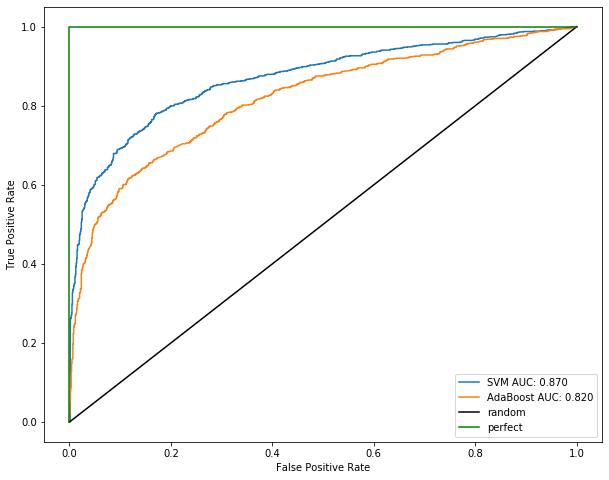

In [89]:
y_score_svm = SVM_model.decision_function(x_test)
y_score_adb = adb_model.decision_function(x_test)

fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test, y_score_svm)
fpr_adb, tpr_adb, thresholds_adb = metrics.roc_curve(y_test, y_score_adb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, label = 'SVM AUC: %.3f'%0.87)
plt.plot(fpr_adb,tpr_adb, label= 'AdaBoost AUC: %.3f'%0.82)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Used joblib to save the SVM model

In [ ]:
from sklearn.externals import joblib

SVM_model_path = '/Users/SVM_model.pkl'
joblib.dump(SVM_model, SVM_model_path)

In [91]:
model = joblib.load(SVM_model_path) 

print('predicted value', model.predict(x_test[0:10]))
print('ground truth', y_test[0:10])

predicted value [0 1 0 0 1 1 0 0 1 0]
ground truth [0 1 0 0 1 1 0 0 1 0]
